In [1]:
import torch
import torch.nn as nn
from torchvision import datasets ,models,transforms
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.nn import Linear, ReLU, CrossEntropyLoss, Conv2d, MaxPool2d, Module
from torch.optim import Adam
import pandas as pd
import os
from os import listdir
from tqdm import tqdm_notebook as tqdm
from PIL import Image

In [2]:
PATH_train="...../train"
TRAIN =Path(PATH_train)
#Batch：每批丟入多少張圖片
batch_size = 8
#Learning Rate：學習率
LR = 0.0001
transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()]

SyntaxError: unexpected EOF while parsing (4153531462.py, line 7)

In [4]:
import os, shutil 
# 原始目录所在的路径
original_dataset_dir = 'C:\\Users\\hank\\Desktop\\dogs-vs-cats\\train'

# 数据集分类后的目录
base_dir = 'C:\\Users\\hank\\Desktop\\dogs-vs-cats\\train1'
os.mkdir(base_dir)

# # 训练、验证、测试数据集的目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 猫训练图片所在目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 狗训练图片所在目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 猫验证图片所在目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 狗验证数据集所在目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 猫测试数据集所在目录
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 狗测试数据集所在目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 将前1000张猫图像复制到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将下500张猫图像复制到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将下500张猫图像复制到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将前1000张狗图像复制到train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 将下500张狗图像复制到validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 将下500张狗图像复制到test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [5]:
#输出数据集对应目录下图片数量
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [6]:
#网络模型构建
from keras import layers
from keras import models
#keras的序贯模型
model = models.Sequential()
#卷积层，卷积核是3*3，激活函数relu
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
#最大池化层
model.add(layers.MaxPooling2D((2, 2)))
#卷积层，卷积核2*2，激活函数relu
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#最大池化层
model.add(layers.MaxPooling2D((2, 2)))
#卷积层，卷积核是3*3，激活函数relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#最大池化层
model.add(layers.MaxPooling2D((2, 2)))
#卷积层，卷积核是3*3，激活函数relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#最大池化层
model.add(layers.MaxPooling2D((2, 2)))
#flatten层，用于将多维的输入一维化，用于卷积层和全连接层的过渡
model.add(layers.Flatten())
#全连接，激活函数relu
model.add(layers.Dense(512, activation='relu'))
#全连接，激活函数sigmoid
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
#输出模型各层的参数状况
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [21]:
import tensorflow
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])


In [23]:
from keras.preprocessing.image import ImageDataGenerator

# 所有图像将按1/255重新缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 这是目标目录
        train_dir,
        # 所有图像将调整为150x150
        target_size=(150, 150),
        batch_size=20,
        # 因为我们使用二元交叉熵损失，我们需要二元标签
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
#查看上面对于图片预处理的处理结果
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [25]:
#模型训练过程
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


C:\Users\hank\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 35s 157ms/step - loss: 1.1195 - acc: 0.5341 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 6s 59ms/step - loss: 0.7169 - acc: 0.5373 - val_loss: 0.6804 - val_acc: 0.5620
Epoch 3/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6600 - acc: 0.6346 - val_loss: 0.6152 - val_acc: 0.6750
Epoch 4/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6210 - acc: 0.6812 - val_loss: 0.6253 - val_acc: 0.6260
Epoch 5/30
100/100 [==============================] - 6s 58ms/step - loss: 0.5515 - acc: 0.7087 - val_loss: 0.5931 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5171 - acc: 0.7514 - val_loss: 0.6456 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 6s 58ms/step - loss: 0.4917 - acc: 0.7560 - val_loss: 0.6189 - val_acc: 0.7140
Epoch 8/30
100/100 [==============================] - 6s 59ms/step 

In [26]:
#保存训练得到的的模型
model.save('C:\\Users\\hank\\Desktop\\dogs-vs-cats\\cats_and_dogs_small_1.h5')


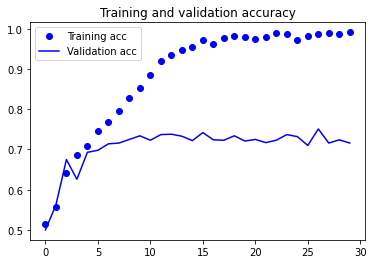

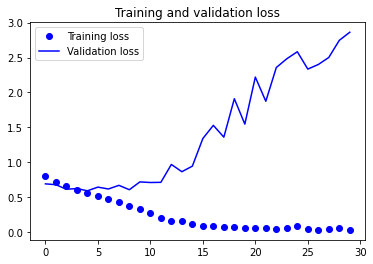

In [27]:
#对于模型进行评估，查看预测的准确性
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
